In [22]:
#Question 1 

#Linked to the assignment

In [23]:
#Question 2, (1 and 2)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Pandas automatically uses some pyplot functions, so we need it loaded
import seaborn as sns

df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['price'] = df['price'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')

print("df.shape:")
print(df.shape, '\n')

print("df.dtypes:")
print(df.dtypes, '\n')

print("df.columns:")
print(df.columns, '\n')

df.head()



df.shape:
(30478, 13) 

df.dtypes:
host_id                         int64
host_since                     object
name                           object
neighbourhood                  object
property_type                  object
review_scores_rating_(bin)    float64
room_type                      object
zipcode                       float64
beds                          float64
number_of_records               int64
number_of_reviews               int64
price                         float64
review_scores_rating          float64
dtype: object 

df.columns:
Index(['host_id', 'host_since', 'name', 'neighbourhood', 'property_type',
       'review_scores_rating_(bin)', 'room_type', 'zipcode', 'beds',
       'number_of_records', 'number_of_reviews', 'price',
       'review_scores_rating'],
      dtype='object') 



,host_id,host_since,name,neighbourhood,property_type,review_scores_rating_(bin),room_type,zipcode,beds,number_of_records,number_of_reviews,price,review_scores_rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [24]:
#Question 2, (3)
room_prop = pd.crosstab(df['room_type'], df['property_type'])
print(room_prop)

#Many of the rentals that are available are apartments despite any kind of room type. Private rooms are more common except for in apartments but in the other variables private rooms are preferred. 

property_type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
room_type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

property_type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
room_type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

property_type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
room_type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

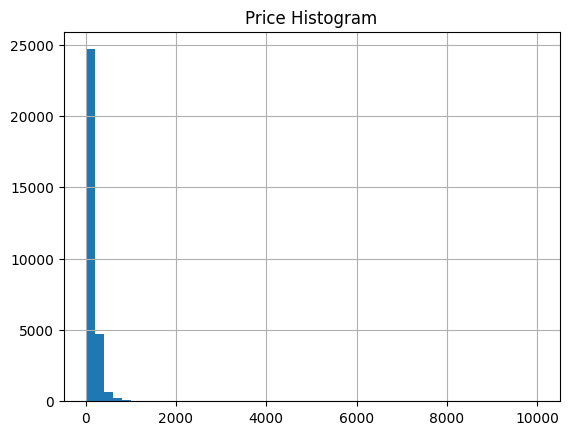

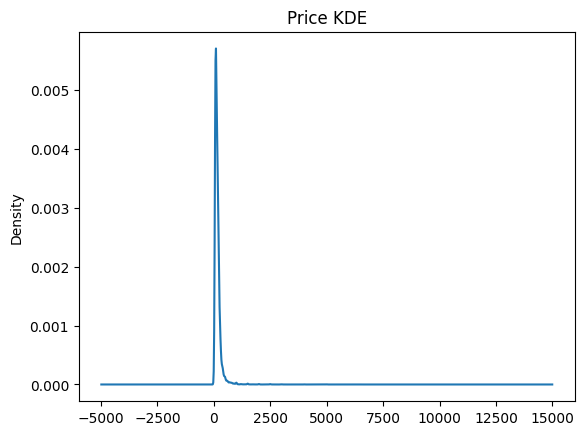

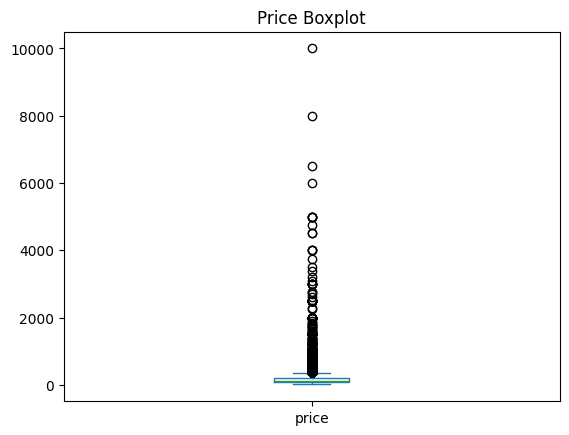

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: price, dtype: float64


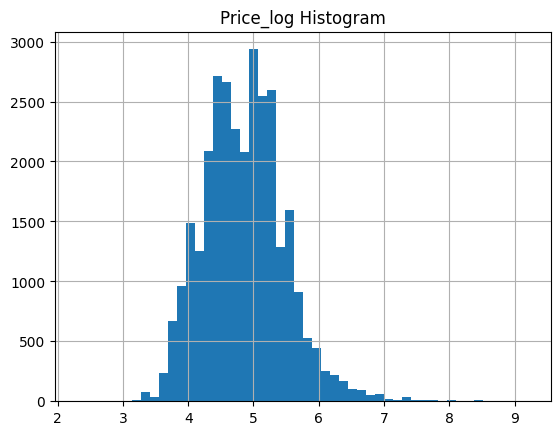

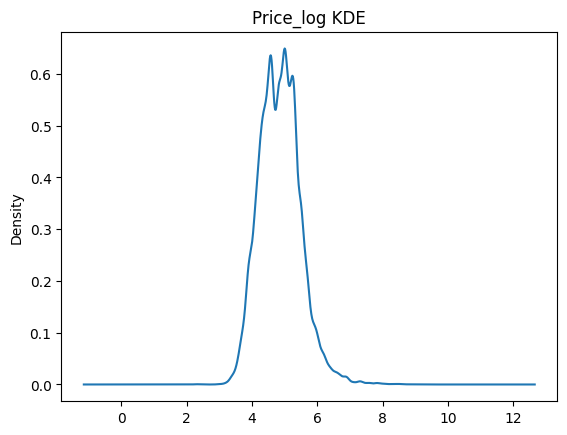

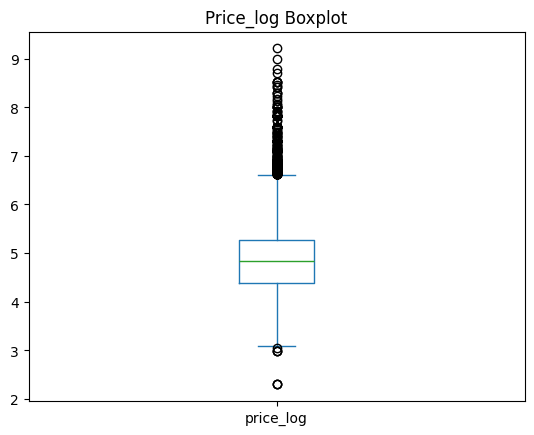

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


In [25]:
#Question 2, (4)
df['price'].hist(bins=50)
plt.title("Price Histogram")
plt.show()

df['price'].plot.kde()
plt.title("Price KDE")
plt.show()

df['price'].plot.box()
plt.title("Price Boxplot")
plt.show()

print(df['price'].describe())

#There are not many outliers that I see. Yes, the data is badly scaled because it is extremely skewed on one side of the curve. 

df['price_log'] = np.where(df['price'] > 0, np.log(df['price']), np.nan)

df['price_log'].hist(bins=50)
plt.title("Price_log Histogram")
plt.show()

df['price_log'].plot.kde()
plt.title("Price_log KDE")
plt.show()

df['price_log'].plot.box()
plt.title("Price_log Boxplot")
plt.show()

print(df['price_log'].describe())


        count         mean          std    min     25%    50%      75%  \
beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

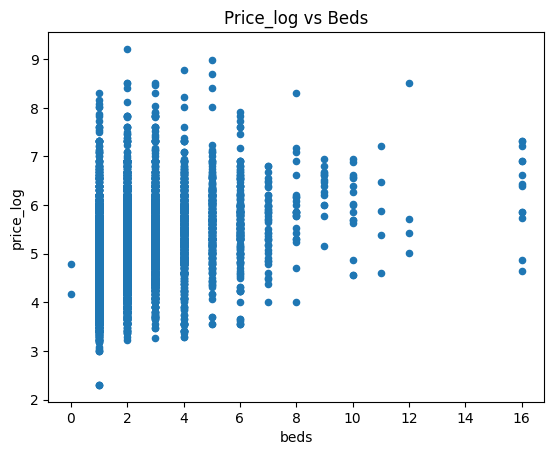

In [26]:
#Question 2, (5)
df.plot.scatter(y='price_log',x='beds')
plt.title("Price_log vs Beds")

print(df.groupby('beds')['price'].describe())

# Standard deviation increases sharply. Average price increases with number of beds. More beds usually result ina. higher risk of outliers

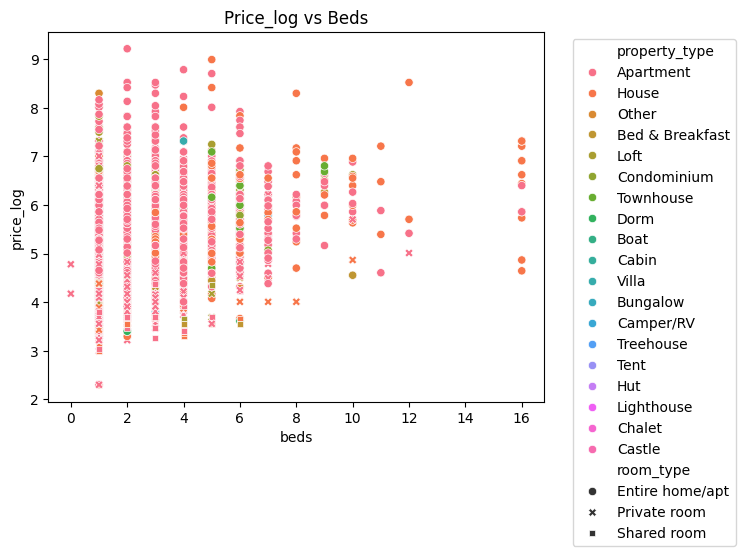

                                   count        mean          std    min  \
room_type       property_type                                              
Entire home/apt Other               14.0  843.428571  1133.062271   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                House              752.0  297.263298   468.409428   27.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Apartment        15669.0  213.224839   218.097834   10.0   
Private room    Other               29.0  211.931034   235.404505   39.0   
Entire home/apt Bed & Breakfast     13.0  184.538462   119.814172   85.0   
Shared room     Treehouse            3.0  167.666667   114.788211   95.0   
Entire home/

In [27]:
#Question 2, (6)

var1 = 'beds'
var2 = 'price_log'
cat1 = 'property_type'
cat2 = 'room_type'

plot= sns.scatterplot(data=df, x=var1, y=var2, hue=cat1, style=cat2)
plot.set(title='Price_log vs Beds')
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.4, 1))
plt.show()

price_by_group = df.groupby(['room_type', 'property_type'])['price'].describe()
print(price_by_group.sort_values('mean', ascending=False))

#Entire homes that are considered Other have the highest prices on average

print(price_by_group['std'].sort_values(ascending=False).head())
#Houses have greatest standard deviation 

#Use median if the results are more skewed or contain outliers. 



In [28]:
# Question 3, (1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Pandas automatically uses some pyplot functions, so we need it loaded
import seaborn as sns

tdf = pd.read_csv('./data/drilling_rigs.csv',low_memory=False)
tdf.head()

print(tdf.shape)
print(tdf.columns)
tdf.dtypes

#There are 623 observations and 10 variables. 
#Some variables may have to be coerced because looking at the types they were read as objects instead of integers. this could be because they haev spaces of commas that need to be removed/cleaned. 
# To clean the data, we need to convert all object columns to numeric, convert the month to a int. 


(623, 10)
Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')


Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                                    

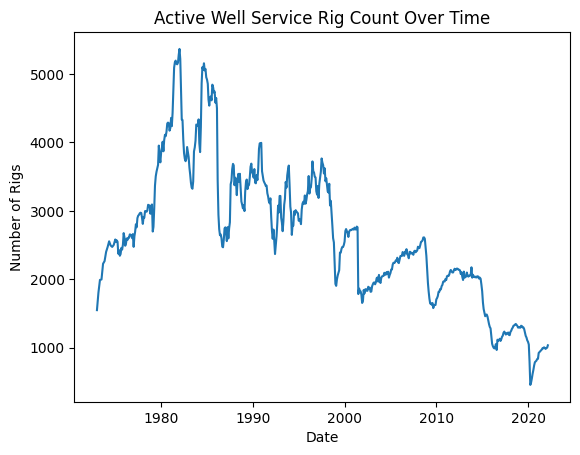

In [29]:
#Question 3, (2+3)
tdf['time'] = pd.to_datetime(tdf['Month'], format='mixed')

var = 'Active Well Service Rig Count (Number of Rigs)'
tdf[var] = pd.to_numeric(tdf[var].astype(str).str.replace(',', ''), errors='coerce')

tdf = tdf.sort_values('time')

fig = sns.lineplot(data=tdf, x='time', y=var)
fig.set(title='Active Well Service Rig Count Over Time',
        xlabel='Date',
        ylabel='Number of Rigs')
plt.show()

# The plot shows a very volatile graph in the short term with many increases and decreases but over time in the long run there is a decrease. 

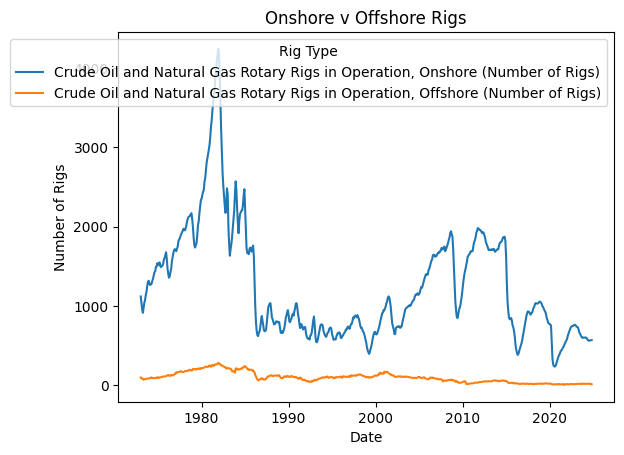

In [30]:
#Question 3, (5)

onshore = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'
offshore = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'

hdf = tdf.melt(id_vars='time', 
               value_vars=[onshore, offshore], 
               var_name='Rig Type', 
               value_name='Count')


fig = sns.lineplot(data=hdf, x='time', y='Count', hue='Rig Type')
fig.set(title='Onshore v Offshore Rigs',xlabel='Date',ylabel='Number of Rigs')
plt.show()


              